# Why are you interested in this dataset?

Battery remaining useful life (RUL) represents the remaining life until the end of life in a car battery. It is used to determine the battery health. I am interested in this particular dataset because I enjoy working on cars and am curious to know what contributes to the EOL (end of life) of the engine. After doing some research, I determined that the factors I should be examining are Cycle Index, Discharge Time (s), Charging Time (s), and RUL because battery life is mainly determined by cycles. And, cycles are defined as the time between charge and discharge according to [CED Greentech](https://www.cedgreentech.com/article/battery-life-and-performance-factors).

---

This dataset came from [this kaggle link](https://www.kaggle.com/datasets/ignaciovinuales/battery-remaining-useful-life-rul). "Battery Remaining Useful Life (RUL). The Hawaii Natural Energy Institute examined 14 NMC-LCO 18650 batteries with a nominal capacity of 2.8 Ah, which were cycled over 1000 times at 25°C with a CC-CV charge rate of C/2 rate and discharge rate of 1.5C.

From that source dataset, I created features that showcase the voltage and current behaviour over each cycle. Those features can be used to predict the remaining useful life (RUL) of the batteries."

# What are 10 (or more) questions that you hope to answer through your data analysis?

No. | Question
:-:|:-

1 | What is the maximum battery cycle?
2 | What is the average discharge time?
3 | What is the average charge time?
4 | Which variable has a positive correlation to remaining useful life?
5 | What type of correlation does charging time and discharge time have?
6 | At what cycle does the RUL decrease?
7 | Out of the 14 batteries, which one had the best RUL?
8 | What is the average max voltage discharge?
9 | What is the average minimun voltage charge?
10 | What type of regression does the data have?

In [71]:
import pandas as pd
import seaborn as sns

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

#raw data
battery_life_data = pd.read_csv("Battery_RUL.csv")
battery_life_data

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


In [66]:
#Trimmed data
updated_data = battery_life_data[['Cycle_Index', 'Discharge Time (s)', 'Charging time (s)', 'RUL']]
updated_data

,Cycle_Index,Discharge Time (s),Charging time (s),RUL
0,1.0,2595.30,10777.82,1112
1,2.0,7408.64,10500.35,1111
2,3.0,7393.76,10420.38,1110
3,4.0,7385.50,10322.81,1109
4,6.0,65022.75,56699.65,1107
...,...,...,...,...
15059,1108.0,770.44,6678.88,4
15060,1109.0,771.12,6670.38,3
15061,1110.0,769.12,6637.12,2
15062,1111.0,773.88,7660.62,1


In [3]:
# Answering question 1: What is the maximum battery cycle?

In [70]:
max_battery_cycle = battery_life_data['Cycle_Index'].max()
print(max_battery_cycle.round(3))

1134.0


In [3]:
# Answering question 2: What is the average discharge time? 

In [36]:
avg_discharge_time = battery_life_data['Discharge Time (s)'].mean()
print(avg_discharge_time.round(3))

4581.274


In [10]:
# Answering question 3: What is the average charge time?

In [34]:
avg_charge_time = battery_life_data['Charging time (s)'].mean()
print(avg_charge_time.round(3))

10066.496


Out of the 4 variables, no variable has a positive correlation to remaining useful life. However, it appears that there is a negative linear correlation between RUL and Cycle Index.


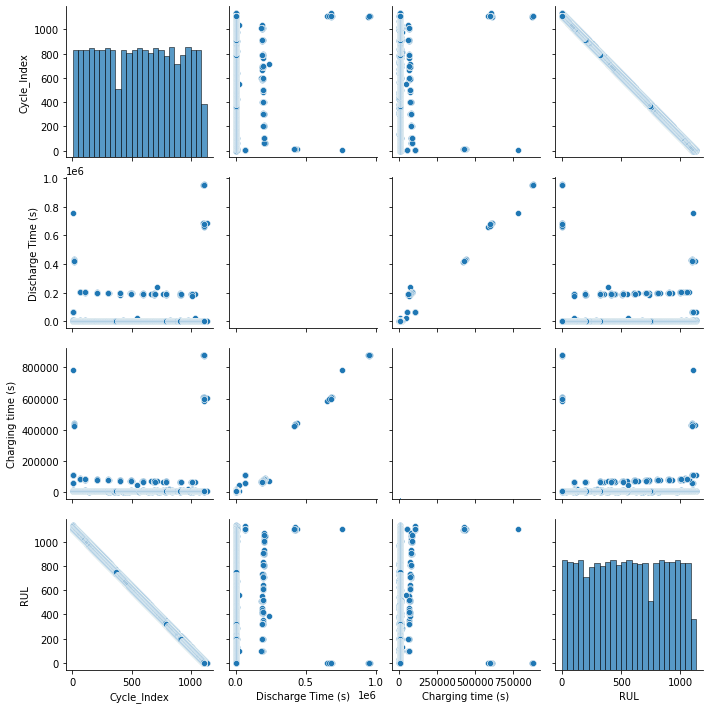

In [88]:
# Answering question 4: Which variable has a positive correlation to remaining useful life?

#Cycle Index and RUL
sns.pairplot(updated_data)

print("Out of the 4 variables, no variable has a positive correlation to remaining useful life. However, it appears that there is a negative linear correlation between RUL and Cycle Index.")


In [6]:
# Answering question 5: What type of correlation does charging time and discharge time have?

No matter how the two are plotted, discharge and charging time have a positve linear correlation but not a strong relationship.


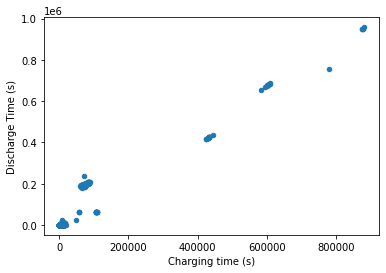

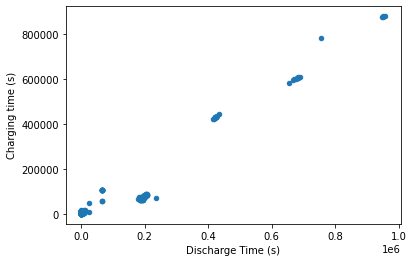

In [86]:
updated_data.plot.scatter(x = 'Charging time (s)', y = 'Discharge Time (s)')
updated_data.plot.scatter(x = 'Discharge Time (s)', y = 'Charging time (s)')

print("No matter how the two are plotted, discharge and charging time have a positve linear correlation but not a strong relationship.")

In [7]:
# Answering question 6: At what cycle does the RUL decrease?

Based on the scatter plot, the RUL decreases instantaneously at Cycle Index 0. This makes sense because there is no way to reverse the wear that cars experience the moment they turn on. It is just like how most passenger vehicles depreciate in value the moment the owner purchases them and takes them off the lot.


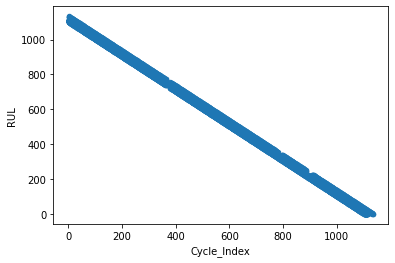

In [87]:
battery_life_data.plot.scatter(x = 'Cycle_Index', y = 'RUL')

print("Based on the scatter plot, the RUL decreases instantaneously at Cycle Index 0. This makes sense because there is no way to reverse the wear that cars experience the moment they turn on. It is just like how most passenger vehicles depreciate in value the moment the owner purchases them and takes them off the lot.")

In [8]:
# Answering question 7:  

In [9]:
# Answering question 8: What is the average max voltage discharge?

In [37]:
avg_max_volt_discharge = battery_life_data['Max. Voltage Dischar. (V)'].mean()
print(avg_max_volt_discharge.round(3))

3.908


In [16]:
# Answering question 9: What is the average minimun voltage charge?

In [38]:
avg_min_volt_charge = battery_life_data['Min. Voltage Charg. (V)'].mean()
print(avg_min_volt_charge.round(3))

3.578


In [11]:
# Answering question 10: What type of regression does the data have?

In [61]:
battery_life_data.lmplot()

TypeError: PlotAccessor.scatter() missing 2 required positional arguments: 'x' and 'y'